In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import statsmodels.formula.api as smf
from scipy.stats import norm, pearsonr
from empiricaldist import Pmf, Cdf

In [2]:
# Configure matplotlib style
sns.set_style('white')
sns.set_context('notebook')
# sns.set_palette('Greens')

In [3]:
# Load a dummy dataset
mpg = sns.load_dataset('mpg')

# Set years as datetime
mpg['model_year'] = pd.to_datetime(mpg['model_year'].apply(lambda x: f'19{x}'))

# Car company 
mpg['company'] = mpg['name'].apply(lambda x: x.split(' ')[0])

# Remove car name
mpg.drop('name', axis=1, inplace=True)

In [4]:
# Display table
mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,company
68,13.0,8,350.0,155.0,4502,13.5,1972-01-01,usa,buick
42,12.0,8,383.0,180.0,4955,11.5,1971-01-01,usa,dodge
304,37.3,4,91.0,69.0,2130,14.7,1979-01-01,europe,fiat
201,18.5,6,250.0,110.0,3645,16.2,1976-01-01,usa,pontiac
46,22.0,4,140.0,72.0,2408,19.0,1971-01-01,usa,chevrolet


In [5]:
mpg.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [6]:
# Set datatypes
mpg = mpg.astype({'mpg': float, 'cylinders': int, 'displacement': float, 'horsepower': float, 'acceleration': float, 'origin': 'category', 'company': 'category'})

# Display info
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   mpg           398 non-null    float64       
 1   cylinders     398 non-null    int64         
 2   displacement  398 non-null    float64       
 3   horsepower    392 non-null    float64       
 4   weight        398 non-null    int64         
 5   acceleration  398 non-null    float64       
 6   model_year    398 non-null    datetime64[ns]
 7   origin        398 non-null    category      
 8   company       398 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(4), int64(2)
memory usage: 24.3 KB


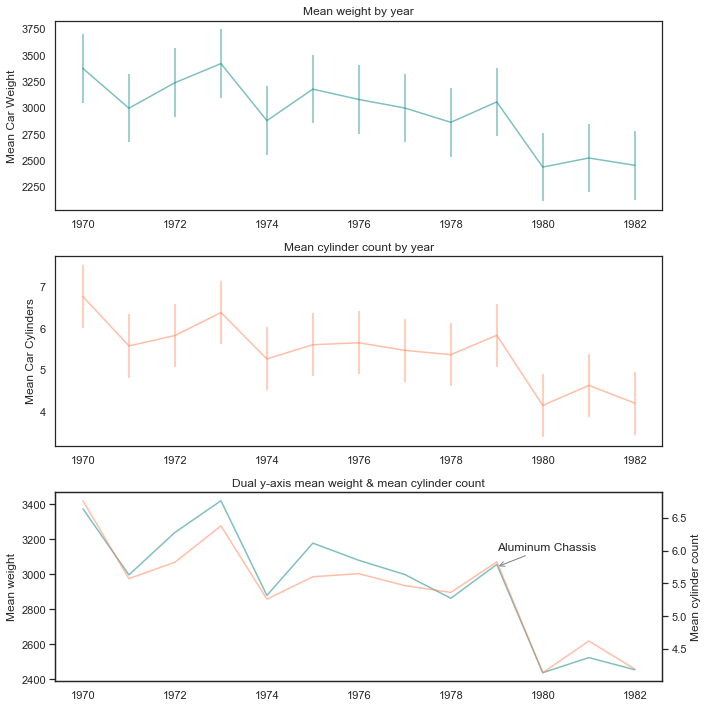

In [7]:
# Build a Twin axis dual plot
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Mean car weight by year
year_trends = mpg.groupby('model_year')[['weight', 'cylinders']].mean()

# Plot year vs mean weight and config axes
ax[0].errorbar(year_trends.index, year_trends['weight'], yerr=year_trends['weight'].std(), label='Mean Car Weight', alpha=0.5, color='#008080')
ax[0].set(ylabel='Mean Car Weight', title='Mean weight by year')

# Plot year vs mean weight and config axes
ax[1].errorbar(year_trends.index, year_trends['cylinders'], yerr=year_trends['cylinders'].std(), color='#FF7F50', label='Mean Car Cylinders', alpha=0.5)
ax[1].set(ylabel='Mean Car Cylinders', title='Mean cylinder count by year')

# Double Y-axis plot
ax[2].plot(year_trends.index, year_trends['weight'], label='Mean Car Weight', alpha=0.5, color='#008080')
ax[2].set(ylabel='Mean weight', title='Dual y-axis mean weight & mean cylinder count')

# Get a copy of x axis for a double y-axis plot
ax2 = ax[2].twinx()

# Plot year vs mean cylinder count and config axes
ax2.plot(year_trends.index, year_trends['cylinders'], color='#FF7F50', label='Mean Car Cylinders', alpha=0.5)
ax2.set(ylabel='Mean cylinder count')
ax2.grid(False)

# Annotate plot
ax2.annotate(
    "Aluminum Chassis",
    xy=(pd.Timestamp('1979'), 5.75),
    xytext=(pd.Timestamp('1979'), 6),
    arrowprops={'arrowstyle': '->', 'color': 'grey'})


# Display plot
plt.tight_layout()
plt.show()

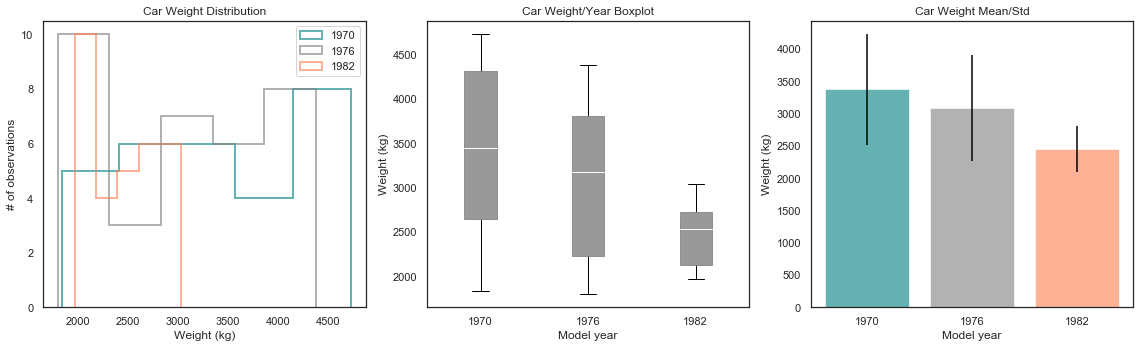

In [8]:
# Build a hollow histogram of weight the first and last year
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
colors = dict(zip(['1970', '1982', '1976'], ['#008080', '#FF7F50', '#808080']))


# Fiter datasets
weight_1970 = mpg[mpg['model_year'] == '1970']['weight']
weight_1982 = mpg[mpg['model_year'] == '1982']['weight']
weight_1976 = mpg[mpg['model_year'] == '1976']['weight']


# Plot hist of 1970
ax[0].hist(weight_1970, histtype='step', label='1970', bins=5, alpha=0.6, linewidth=2, color=colors['1970'])
ax[0].hist(weight_1976, histtype='step', label='1976', bins=5, alpha=0.6, linewidth=2, color=colors['1976'])
ax[0].hist(weight_1982, histtype='step', label='1982', bins=5, alpha=0.6, linewidth=2, color=colors['1982'])

# Boxplot
ax[1].boxplot([weight_1970, weight_1976, weight_1982], patch_artist=True, medianprops=dict(color='white'), boxprops=dict(facecolor='gray', color='gray', alpha=0.8))

# Mean/Std Bars
ax[2].bar("1970", weight_1970.mean(), yerr=weight_1970.std(), alpha=0.6, color=colors['1970'])
ax[2].bar("1976", weight_1976.mean(), yerr=weight_1976.std(), alpha=0.6, color=colors['1976'])
ax[2].bar("1982", weight_1982.mean(), yerr=weight_1982.std(), alpha=0.6, color=colors['1982'])

# Set axis labels and title
ax[0].set(xlabel='Weight (kg)', ylabel='# of observations', title='Car Weight Distribution')
ax[1].set(xticklabels=['1970', '1976', '1982'], ylabel='Weight (kg)', xlabel='Model year', title='Car Weight/Year Boxplot')
ax[2].set(xticklabels=['1970', '1976', '1982'], ylabel='Weight (kg)', xlabel='Model year', title='Car Weight Mean/Std')


# Add legend and display plot
ax[0].legend()
plt.tight_layout()
plt.show()

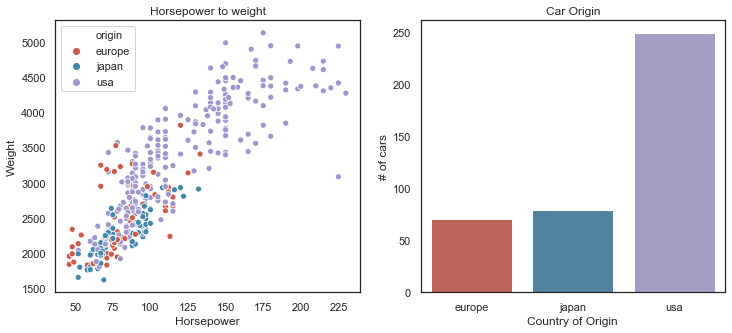

In [9]:
# Scatterplot of weight and cylinders
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
origin_color = {'usa': '#9E97CC', 'japan': '#4586AC', 'europe': '#CC5A49'}

# Plot yearly trend as a scatterplot
sns.scatterplot(x='horsepower', y='weight', hue='origin', hue_order=['europe', 'japan', 'usa'], data=mpg, ax=ax[0], palette=origin_color)
sns.countplot(x='origin', data=mpg, ax=ax[1], palette=origin_color)

# Configure plot
ax[0].set(xlabel='Horsepower', ylabel='Weight', title='Horsepower to weight')
ax[1].set(xlabel='Country of Origin', ylabel='# of cars', title='Car Origin')

# Show plot
plt.show()

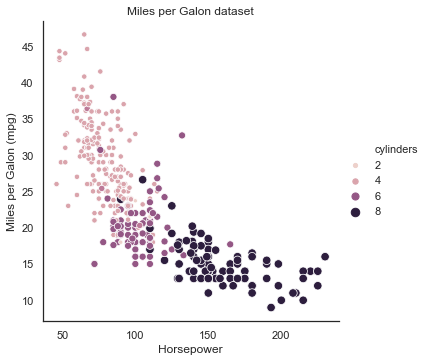

In [10]:
# Create scatter plot of horsepower vs. mpg
ax = sns.relplot(x="horsepower", y="mpg", data=mpg, kind="scatter",  size="cylinders", hue="cylinders")

# Set configuration
ax.set(xlabel='Horsepower', ylabel='Miles per Galon (mpg)', title='Miles per Galon dataset')

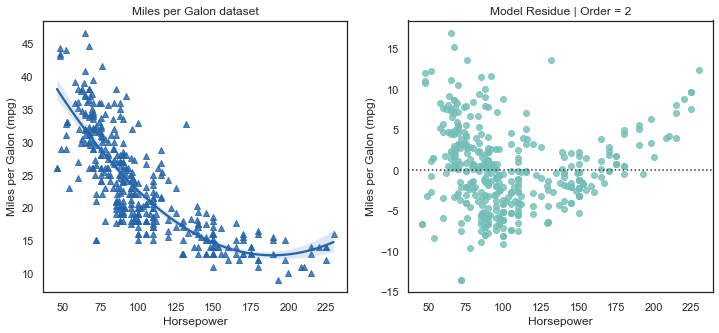

In [11]:
# Build figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Model order
order = 2

# Create scatter plot of horsepower vs. mpg
sns.regplot(x="horsepower", y="mpg", data=mpg, order=order, marker='^', color='#2364AA', ax=ax[0])
sns.residplot(x="horsepower", y="mpg", data=mpg, color='#73BFB8', ax=ax[1])

# Set configuration
ax[0].set(xlabel='Horsepower', ylabel='Miles per Galon (mpg)', title='Miles per Galon dataset')
ax[1].set(xlabel='Horsepower', ylabel='Miles per Galon (mpg)', title=f'Model Residue | Order = {order}')

# Show plot
plt.show()

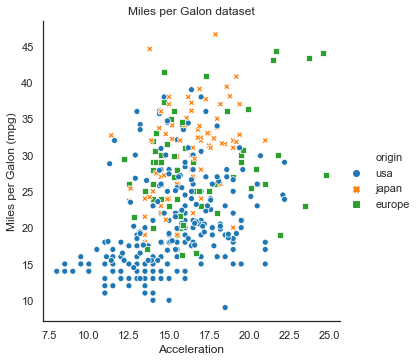

In [12]:
# Create a scatter plot of acceleration vs. mpg
ax = sns.relplot(x='acceleration', y='mpg', style='origin', data=mpg, kind='scatter', hue='origin')

# Set configuration
ax.set(xlabel='Acceleration', ylabel='Miles per Galon (mpg)', title='Miles per Galon dataset')

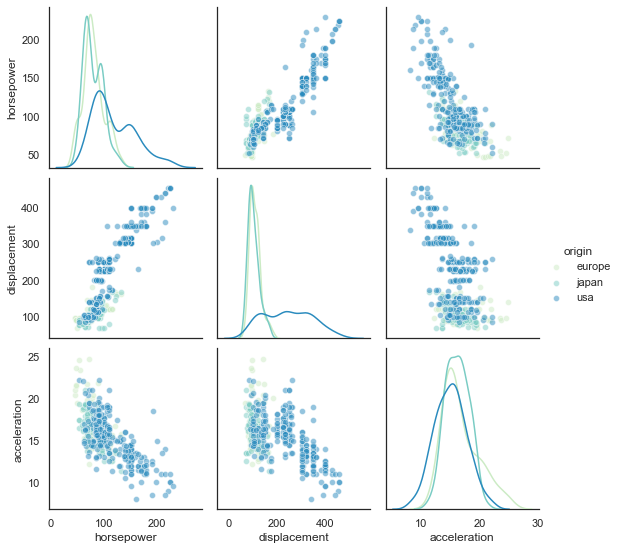

In [13]:
# Pairplot of important mpg variables
g = sns.pairplot(
    data=mpg, vars=['horsepower', 'displacement', 'acceleration'], 
    hue="origin", palette='GnBu', kind='scatter', diag_kind='kde',
    diag_kws={'alpha': 1, 'shade': False}, plot_kws={'alpha':.5}
)

In [14]:
# New dataset for bar plotting (Medals)
olympics = pd.read_csv('datasets/olympics_toy.csv')

# Sample dataset
olympics.head(5)

,Country,Bronze,Gold,Silver
0,United States,67,137,52
1,Germany,67,47,43
2,Great Britain,26,64,55
3,Russia,35,50,28
4,China,35,44,30


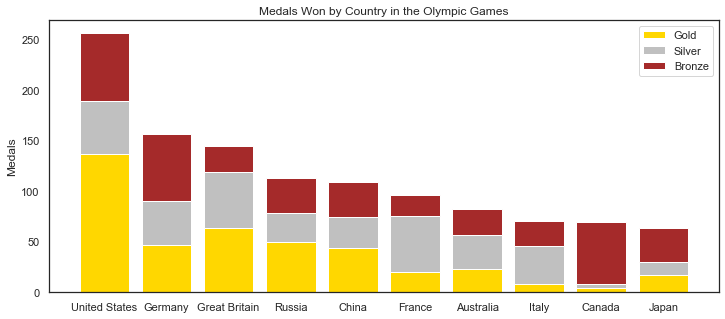

In [15]:
# Build figure
fig, ax = plt.subplots(figsize=(12, 5))

# Add data to axis
ax.bar(olympics['Country'], olympics['Gold'], label='Gold', color='gold')
ax.bar(olympics['Country'], olympics['Silver'], label='Silver', bottom=olympics['Gold'], color='silver')
ax.bar(olympics['Country'], olympics['Bronze'], label='Bronze', bottom=olympics['Gold'] + olympics['Silver'], color='brown')

# Set configuration
ax.set(title='Medals Won by Country in the Olympic Games', ylabel='Medals')

# Display legend and figure
plt.legend()
plt.show()

In [16]:
# Load tips dataset
tips = sns.load_dataset('tips')

In [17]:
# Show dataset
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
83,32.68,5.00,Male,Yes,Thur,Lunch,2
166,20.76,2.24,Male,No,Sun,Dinner,2
42,13.94,3.06,Male,No,Sun,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2


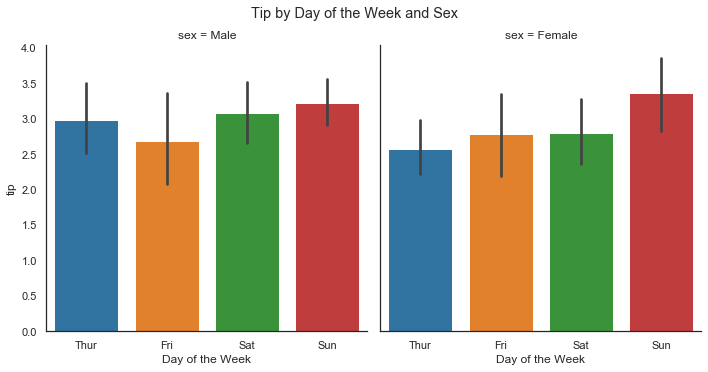

In [18]:
# Tips by sex
g = sns.catplot(
    x="day", y="tip", data=tips,
    kind="bar", col="sex"
)

# Set configuration
g.set(xlabel="Day of the Week")
g.fig.suptitle('Tip by Day of the Week and Sex', y=1.03)

# Show plot
plt.show()

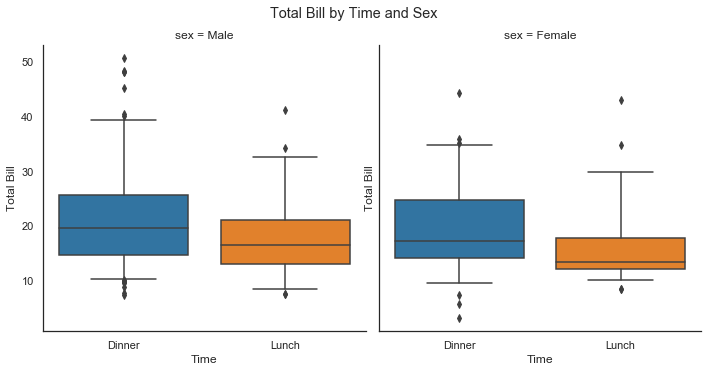

In [19]:
# Total bill by time
ax = sns.catplot(
    x="time", y="total_bill", order=["Dinner", "Lunch"],
    data=tips, kind="box", col='sex', sym="b", whis=[5, 95]
)

# Set configuration
ax.fig.suptitle('Total Bill by Time and Sex', y=1.03)
ax.set(xlabel="Time", ylabel='Total Bill')

# Show plot
plt.show()

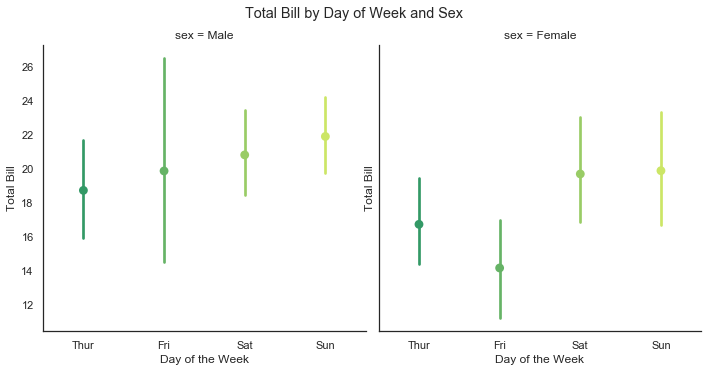

In [20]:
# Total bill by day
ax = sns.catplot(
    x="day", y="total_bill", data=tips, kind="point", 
    col='sex', sym="b", whis=[2.5, 97.5], palette="summer"
)

# Set configuration
ax.fig.suptitle('Total Bill by Day of Week and Sex', y=1.03)
ax.set(xlabel="Day of the Week", ylabel='Total Bill')

# Show plot
plt.show()

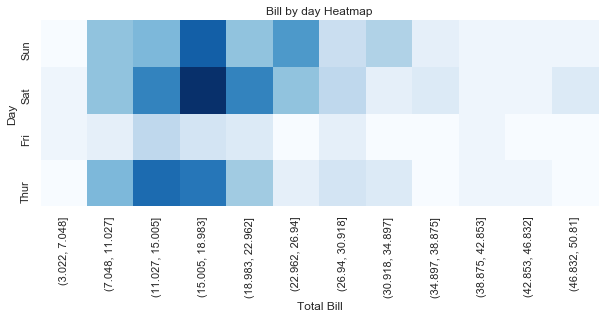

In [21]:
# Bin total bills
tips['binned_bill'] = pd.cut(tips['total_bill'], bins=12)

# Crosstab day and binned bill
day_bill_crosstab = pd.crosstab(tips['day'], tips['binned_bill'])

# Draw figure
fig, ax = plt.subplots(figsize=(10, 5))

# Build heatmap
sns.heatmap(day_bill_crosstab, ax=ax, cbar=False, cmap='Blues')

# Configure plot
ax.invert_yaxis()
ax.set_aspect("equal")
ax.set(ylabel="Day", xlabel='Total Bill', title='Bill by day Heatmap')

# Show plot
plt.show()

In [22]:
# Load new dataset
car_crashes = sns.load_dataset('car_crashes')

# Show head
car_crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


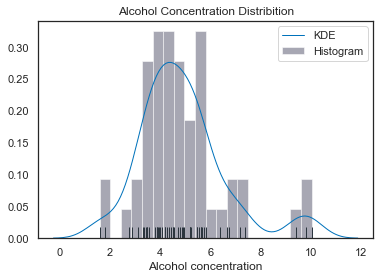

In [23]:
# Probability mass function of car_crashes alcohol
ax = sns.distplot(
    a=car_crashes['alcohol'], bins=20, rug=True, color='#2C363F',
    axlabel='Alcohol concentration', label="Histogram",
    kde_kws={"color": "k", "lw": 1, "label": "KDE", 'color': "#0072BB"},
    hist_kws={"linewidth": 1, "alpha": 0.5, "color": "#505168"})

# Add title
ax.set(title='Alcohol Concentration Distribition')

# Show data
plt.show()

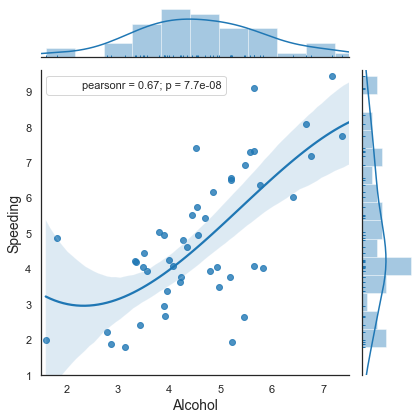

In [24]:
# Build plot
g = sns.jointplot(
    x='alcohol', y='speeding', data=car_crashes, 
    kind='reg', order=3, xlim=(1.5, 7.5), ylim=(1, 9.6),
    marginal_kws=dict(bins=15, rug=True, kde=True, hist=True))

# Configure plot
g.set_axis_labels('Alcohol', 'Speeding', fontsize=14)

# Annotate
g.annotate(pearsonr)

# Show plot
plt.tight_layout()
plt.show()

In [25]:
# Log car crashes
fatalities = np.log10(car_crashes['total'])

# Mean and STD
f_mean, f_std = fatalities.mean(), fatalities.std()

# Generate theorical distribution
f_dist = norm(f_mean, f_std)
xs = np.linspace(fatalities.min(), fatalities.max())
ys = f_dist.cdf(xs)

# Calc empiric CDF
emp_cdf = fatalities.value_counts(normalize=True).sort_index().cumsum()

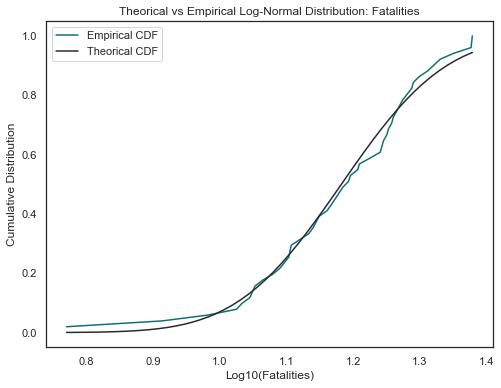

In [26]:
# Build figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot both distribs
sns.lineplot(emp_cdf.index, emp_cdf, label='Empirical CDF', color='#0F7173', ax=ax)
sns.lineplot(xs, ys, label='Theorical CDF', color='#272932', ax=ax)

# Configure plot
ax.set(title="Theorical vs Empirical Log-Normal Distribution: Fatalities", xlabel='Log10(Fatalities)', ylabel="Cumulative Distribution")

# Show plot
plt.show()

In [27]:
# Load iris dataset
iris = sns.load_dataset('iris')

# Show iris
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


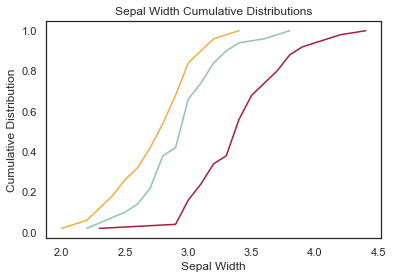

In [28]:
# Extract CDFs for sepal_width
for species, color in zip(iris['species'].unique(), ['#A61C3C', '#F4AC45', '#92BFB1']):

    # Filter by species
    cdf_ = iris.query(f"species == '{species}'")['sepal_width']

    # Get CMF by count -> sort -> cumsum
    cdf_ = cdf_.value_counts(normalize=True).sort_index().cumsum()

    # Plot cdf_
    ax = sns.lineplot(x=cdf_.index, y=cdf_, color=color)

# Configure plot
ax.set(title='Sepal Width Cumulative Distributions', xlabel='Sepal Width', ylabel='Cumulative Distribution')

# Display
plt.show()

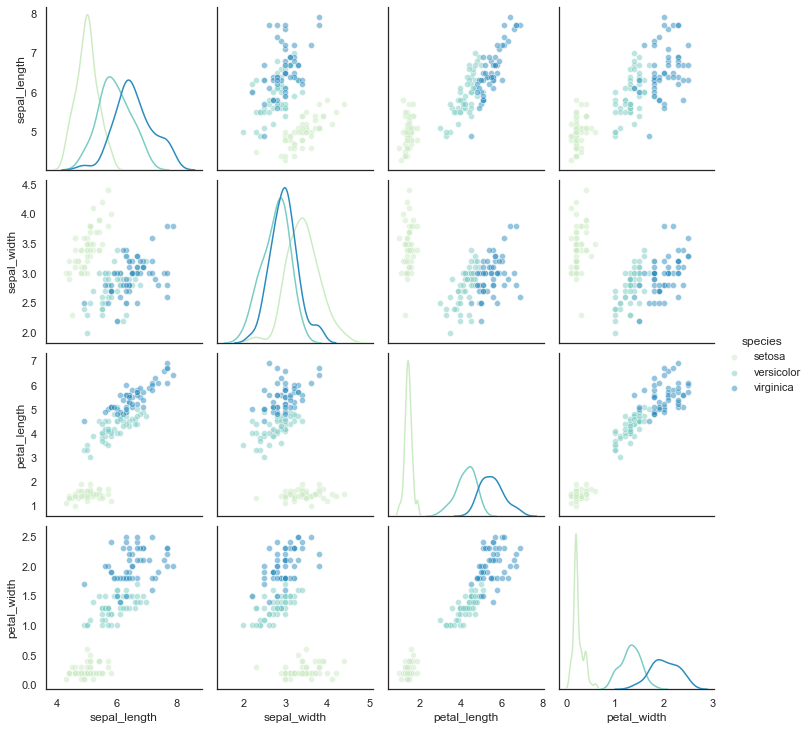

In [29]:
# Relationship between variables
ax = sns.pairplot(
    data=iris, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
    hue="species", palette='GnBu', kind='scatter', diag_kind='kde',
    diag_kws={'alpha': 1, 'shade': False}, plot_kws={'alpha':.5}
)

<h3>Univariate linear regression</h3>

In [30]:
# Univariate linear regression
iris_reg = smf.ols('petal_length ~ petal_width', data=iris).fit()

# Display learnt parameters
iris_reg.params

Intercept      1.083558
petal_width    2.229940
dtype: float64

In [31]:
# Generate grid space
iris_grid = pd.DataFrame()

# Add search space with non-linearity
iris_grid['petal_width'] = np.linspace(0, 3)

# Generate prediction
petal_length_pred = iris_reg.predict(iris_grid)

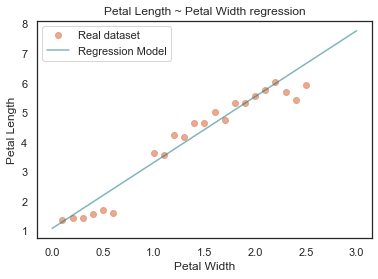

In [32]:
# Plot real data
mean_length_by_width = iris.groupby('petal_width')['petal_length'].mean()

# Plot quantities
plt.plot(mean_length_by_width, 'o', color='#E29578', alpha=0.8, label='Real dataset')

# Plot model
plt.plot(iris_grid['petal_width'], petal_length_pred, '-', color='#006D77', alpha=0.5, label='Regression Model')

# Show both plots
plt.title('Petal Length ~ Petal Width regression')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')

# Show plot
plt.legend()
plt.show()

<h3>Multivariate linear regression</h3>

In [33]:
# Add non-linearity to data
iris['petal_length2'] = iris['petal_length'] ** 2
iris['sepal_width2'] = iris['sepal_width'] ** 2

# Run multivariate regression
multi_iris_reg = smf.ols('sepal_length ~ petal_length + petal_length2 + sepal_width + sepal_width2', data=iris).fit()

# Show parameters
multi_iris_reg.params

Intercept        4.531670
petal_length     0.173580
petal_length2    0.041424
sepal_width     -0.520678
sepal_width2     0.161283
dtype: float64

In [34]:
def iris_grid(petal_length=1, sepal_width=1):
    """Generate iris grid"""

    # Generate grid search space
    iris_grid_ = pd.DataFrame({'petal_length': petal_length, 'sepal_width': sepal_width})

    # Add non linearity
    iris_grid_['petal_length2'] = iris_grid_['petal_length'] ** 2
    iris_grid_['sepal_width2'] = iris_grid_['sepal_width'] ** 2

    return iris_grid_

In [35]:
# Generate grids for datasets with static sepal widths
grids = [iris_grid(petal_length=np.linspace(4, 8), sepal_width=n) for n in np.arange(0, 1, 0.5)]

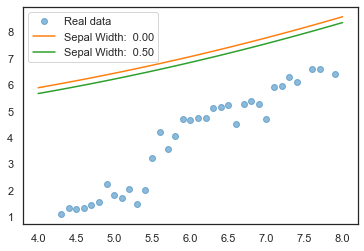

In [36]:
# Calc sepal_length mean
mean_iris = iris.groupby('sepal_length')['petal_length'].mean()

# Plot mean real data
plt.plot(mean_iris, 'o', label='Real data', alpha=0.5)

# Plot models
for i, grid in enumerate(grids):

    # Generate prediction
    pred = multi_iris_reg.predict(grid)

    # Plot model
    plt.plot(grid['petal_length'], pred, label=f"Sepal Width: {grid['sepal_width'].mean(): 2.2f}")

# Show model
plt.legend()
plt.show()

In [37]:
# Generate grids for datasets with static petal_length
grids = [iris_grid(petal_length=n, sepal_width=np.linspace(0, 8)) for n in np.arange(0, 6, 2)]

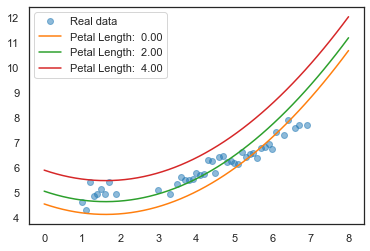

In [38]:
# Calc sepal_length mean
mean_iris = iris.groupby('petal_length')['sepal_length'].mean()

# Plot mean real data
plt.plot(mean_iris, 'o', label='Real data', alpha=0.5)

# Plot models
for i, grid in enumerate(grids):

    # Generate prediction
    pred = multi_iris_reg.predict(grid)

    # Plot model
    plt.plot(grid['sepal_width'], pred, label=f"Petal Length: {grid['petal_length'].mean(): 2.2f}")

# Show plot with legend
plt.legend()
plt.show()

In [39]:
# Load Titanic Dataset
titanic = sns.load_dataset('titanic')

# Show 10 rows
titanic.head(n=10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [40]:
# Add quadratic terms
titanic['age2'] = titanic['age'] ** 2

# Predict survive based on sex, class and fare
titanic_logit = smf.logit('survived ~ age + age2 + C(adult_male)', data=titanic).fit()

# Display params
titanic_logit.params

Optimization terminated successfully.
         Current function value: 0.509569
         Iterations 5


Intercept                0.230071
C(adult_male)[T.True]   -2.745067
age                      0.046648
age2                    -0.000470
dtype: float64

In [41]:
# Data grid constructor
def data_grid(**kwargs):
    """Generate a data grids for model visualization"""

    # Instantiate DataFrame
    df_ = pd.DataFrame()

    # Add data to df_
    for k,v in kwargs.items():

        # Add column and values
        df_[str(k)] = v
        df_[str(k) + '2'] = v ** 2
    
    # Return df_
    return df_

In [42]:
# Generate grids for datasets with static pclass
grids = [data_grid(age=np.linspace(0, 100), adult_male=n) for n in [True, False]]

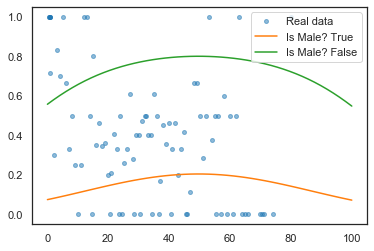

In [43]:
# Calc survivial mean
mean_titanic = titanic.groupby('age')['survived'].mean()

# Plot mean real data
plt.plot(mean_titanic, 'o', label='Real data', alpha=0.5, markersize=4)

# Plot models
for grid in grids:

    # Generate prediction
    pred = titanic_logit.predict(grid)

    # Plot model
    plt.plot(grid['age'], pred, label=f"Is Male? {grid['adult_male'].mean() == 1}")

# Show plot with legend
plt.legend()
plt.show()